# Building a Neural Network for Image Classification

### Objective

The aim of this project is to build and train a neural network for image classification using the CIFAR-10 dataset. The goal is to classify images into one of the 10 categories (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). Specifically, the objective is to achieve an accuracy of at least 80% on the test dataset.

### Step 1: Data Loading and Preparation

* Load the CIFAR 10 dataset using Keras
* Preprocess the images by normalizing the pixel values.

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
# Load the data
(training_images, training_labels), (testing_images, testing_labels) = cifar10.load_data()

In [3]:
# Normalize the data
training_images, testing_images = training_images/255, testing_images/255

### Step 2: Build the Neural Network

* Define the neural network architecture using Keras. The network should
include convolutional layers followed by fully connected layers
* Compile the model with an appropriate optimizer and loss function for multi
class classification

In [10]:
# Define the model
model = Sequential()

# Build the Neural Network
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
print(model.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

None


### Step 3: Train the Model

* Train the model on the training data. Make sure to use validation data to monitor the model's performance and prevent overfitting.

In [16]:
# Train the model
history = model.fit(training_images, training_labels, epochs=5, validation_data=(testing_images, testing_labels))


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8149 - loss: 0.5268 - val_accuracy: 0.7024 - val_loss: 0.9244
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8267 - loss: 0.4916 - val_accuracy: 0.7044 - val_loss: 0.9353
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8396 - loss: 0.4562 - val_accuracy: 0.7040 - val_loss: 0.9641
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8497 - loss: 0.4247 - val_accuracy: 0.7019 - val_loss: 1.0311
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8606 - loss: 0.3939 - val_accuracy: 0.6986 - val_loss: 1.0222


### Step 4: Evaluate the Model

* Evaluate the model on the test data using accuracy as the metric. Ensure your model achieves an accuracy of at least 80%.
* Plot the training and validation accuracy and loss.

In [17]:
# Evaluate the model
training_loss, training_acc = model.evaluate(training_images, training_labels)
print(f'Test Accuracy: {training_acc:.4f}')

testing_loss, testing_acc = model.evaluate(testing_images, testing_labels)
print(f'Test Accuracy: {testing_acc:.4f}')

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8775 - loss: 0.3542
Test Accuracy: 0.8751
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7011 - loss: 1.0144
Test Accuracy: 0.6986


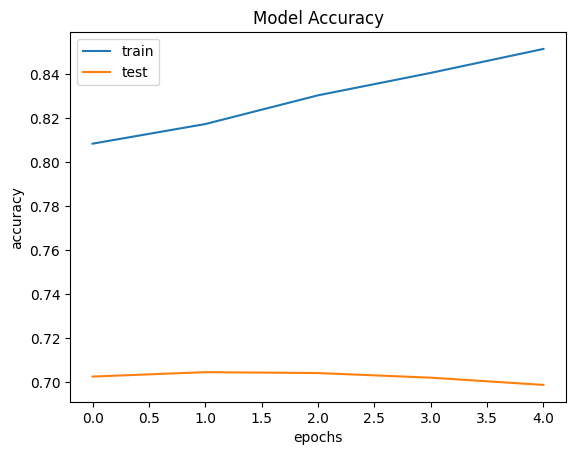

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

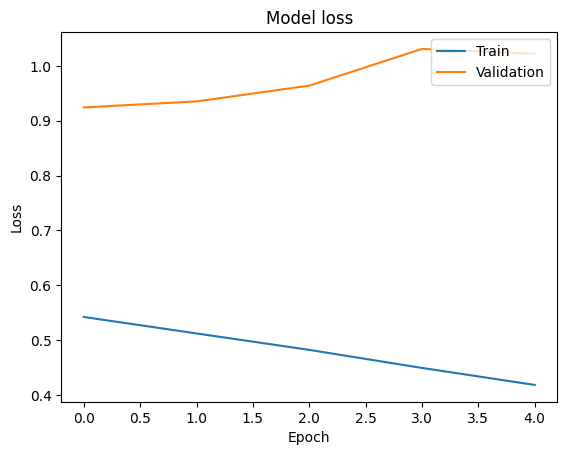

In [18]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Step 5: Make Predictions

* Use the trained model to make predictions on new images.
* Analyze the predictions and the corresponding probabilities.

In [14]:
# Make predictions
model.predict(testing_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[1.44567224e-04, 5.24815005e-05, 5.30362222e-03, ...,
        6.50332251e-04, 5.31093916e-04, 1.74091561e-04],
       [1.66317243e-02, 1.78148642e-01, 2.46866398e-06, ...,
        3.59896539e-08, 8.02612185e-01, 2.60086381e-03],
       [5.82443736e-02, 3.18973690e-01, 1.01360008e-02, ...,
        7.24497077e-04, 3.35336208e-01, 2.50672460e-01],
       ...,
       [1.32187115e-05, 8.71371469e-07, 1.94307510e-02, ...,
        2.97036627e-03, 2.23211428e-05, 2.19646736e-05],
       [2.39340924e-02, 2.53132079e-02, 2.11413391e-02, ...,
        1.90103315e-02, 1.35424419e-03, 1.05241174e-03],
       [9.63635443e-07, 1.76440054e-07, 4.10695393e-05, ...,
        9.86051142e-01, 1.01473631e-06, 1.21859841e-07]], dtype=float32)

### Step 6: Performance Analysis and Interpretation

* Add a section where you analyze the model's performance and interpret the results. Discuss any potential issues such as overfitting or class imbalance. Reflect on the effectiveness of your model and suggest any possible improvements.